In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [4]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Skin Disease Prediction(CNN)/hmnist_28_28_RGB.csv')
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [5]:
data.shape

(10015, 2353)

In [6]:
y = data['label']
x = data.drop(columns = ['label'])

In [8]:
tabular_data = pd.read_csv('/content/drive/MyDrive/Skin Disease Prediction(CNN)/HAM10000_metadata.csv')
tabular_data.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [9]:
tabular_data.shape

(10015, 7)

In [10]:
tabular_data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


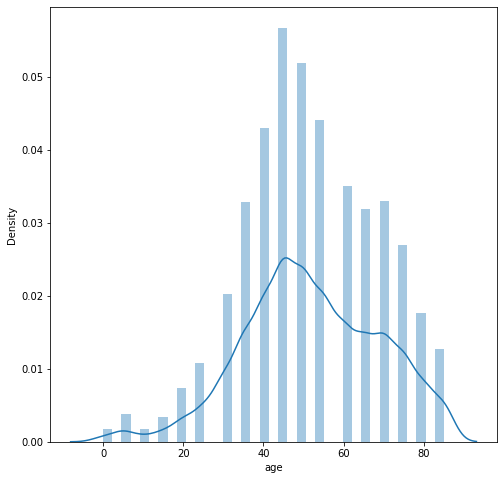

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(tabular_data.age)

In [12]:

tabular_data['age'].fillna(tabular_data['age'].median(),inplace=True)

In [13]:
tabular_data.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [14]:
 classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

In [15]:
tabular_data.groupby('dx').mean()
tabular_data['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Classes')

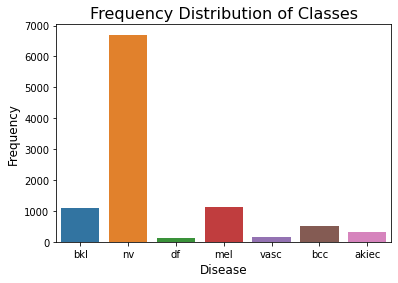

In [16]:
sns.countplot(x = 'dx', data = tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)

Text(0.5, 1.0, 'Gender of Patient')

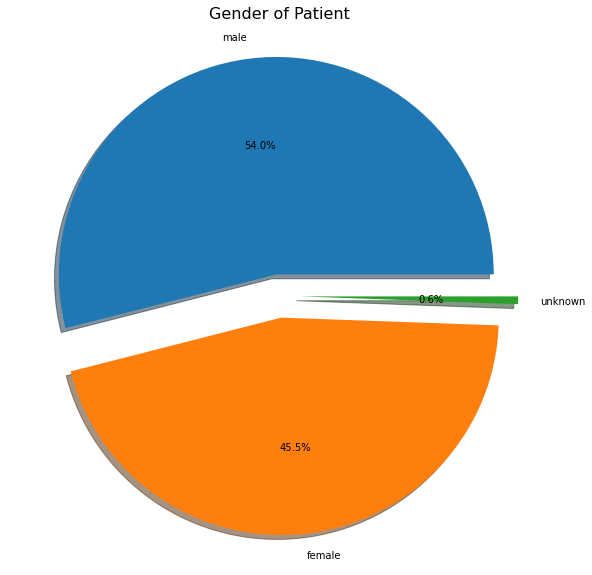

In [17]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%",shadow = True,explode=[0.1,0.1,0.1])
plt.title('Gender of Patient', size=16)

Text(0.5, 1.0, 'Histogram of Age of Patients')

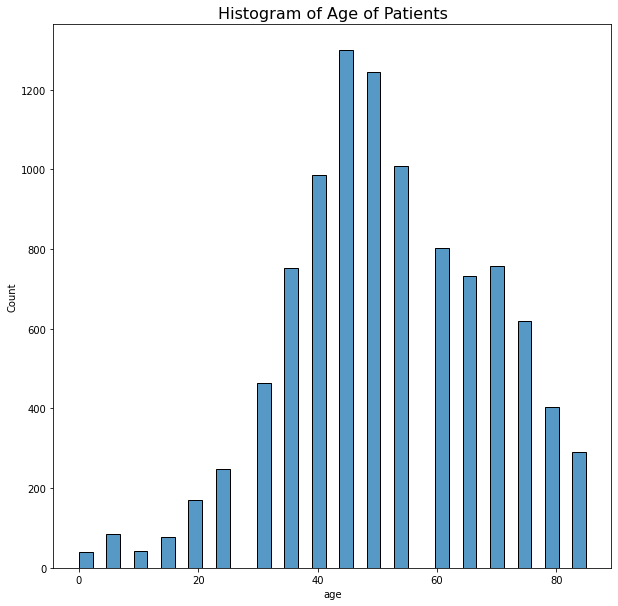

In [18]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

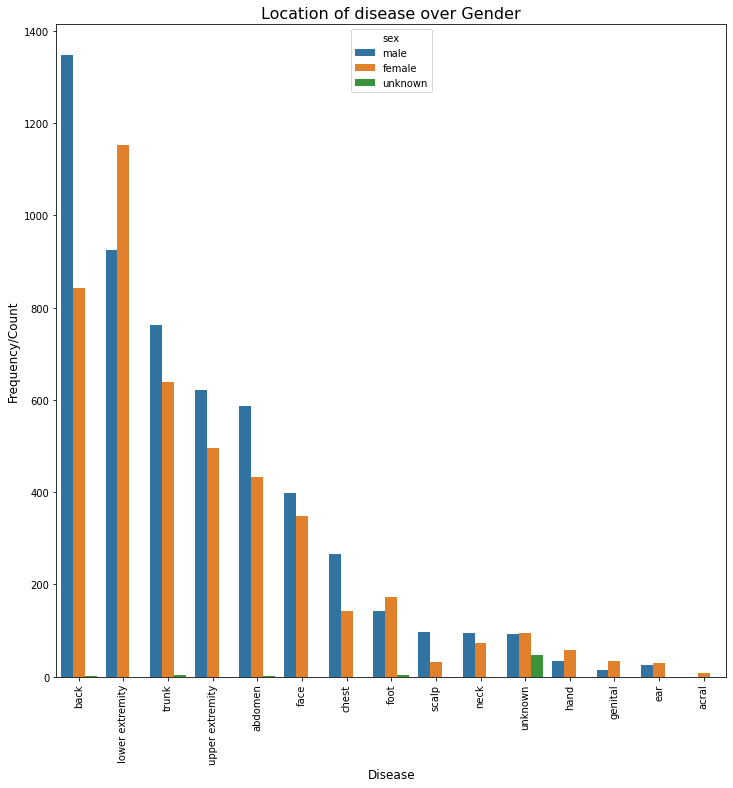

In [19]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [20]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

In [21]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [22]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [23]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [25]:
'''classifier1 = Sequential()
classifier1.add(Conv2D(1, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
classifier1.add(MaxPooling2D(pool_size = (4,4)))

classifier1.add(Flatten())
classifier1.add(Dense(units = 300, activation = 'relu'))


# Start With Pop2 Branch ############################################################

classifier2 = Sequential()
classifier2.add(Conv2D(1, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
classifier2.add(MaxPooling2D(pool_size = (3,3)))

classifier2.add(Flatten())
classifier2.add(Dense(units = 300, activation = 'relu'))

# Making The Combinition ##########################################################

model_concat = Concatenate()([classifier1.output,classifier2.output])

model_concat = Dense(3, activation='softmax')(model_concat)

model = Model(inputs=[classifier1.input,classifier2.input], outputs=model_concat)'''



"classifier1 = Sequential()\nclassifier1.add(Conv2D(1, (3,3), input_shape = (28, 28, 1), activation = 'relu'))\nclassifier1.add(MaxPooling2D(pool_size = (4,4)))\n\nclassifier1.add(Flatten())\nclassifier1.add(Dense(units = 300, activation = 'relu'))\n\n\n# Start With Pop2 Branch ############################################################\n\nclassifier2 = Sequential()\nclassifier2.add(Conv2D(1, (3,3), input_shape = (28, 28, 1), activation = 'relu'))\nclassifier2.add(MaxPooling2D(pool_size = (3,3)))\n\nclassifier2.add(Flatten())\nclassifier2.add(Dense(units = 300, activation = 'relu'))\n\n# Making The Combinition ##########################################################\n\nmodel_concat = Concatenate()([classifier1.output,classifier2.output])\n\nmodel_concat = Dense(3, activation='softmax')(model_concat)\n\nmodel = Model(inputs=[classifier1.input,classifier2.input], outputs=model_concat)"

In [26]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [28]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,     
                    epochs = 10,
                    callbacks=[callback])

Epoch 1/10
235/235 [==============================] - ETA: 0s - loss: 0.3213 - accuracy: 0.8853
Epoch 1: saving model to best_model.h5
235/235 [==============================] - 66s 276ms/step - loss: 0.3213 - accuracy: 0.8853 - val_loss: 0.2848 - val_accuracy: 0.9049
Epoch 2/10
235/235 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.9198
Epoch 2: saving model to best_model.h5
235/235 [==============================] - 65s 277ms/step - loss: 0.2306 - accuracy: 0.9198 - val_loss: 0.2364 - val_accuracy: 0.9190
Epoch 3/10
235/235 [==============================] - ETA: 0s - loss: 0.1906 - accuracy: 0.9316
Epoch 3: saving model to best_model.h5
235/235 [==============================] - 66s 281ms/step - loss: 0.1906 - accuracy: 0.9316 - val_loss: 0.2382 - val_accuracy: 0.9164
Epoch 4/10
235/235 [==============================] - ETA: 0s - loss: 0.1531 - accuracy: 0.9454
Epoch 4: saving model to best_model.h5
235/235 [==============================] - 64s 272ms/step 

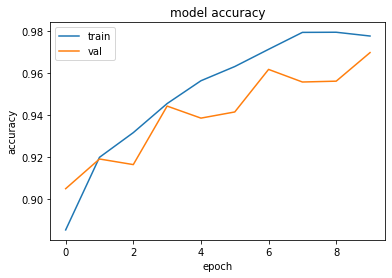

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

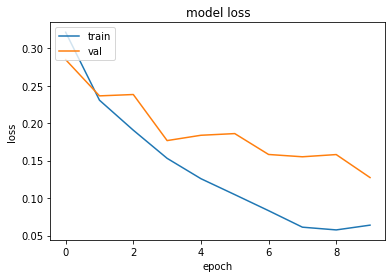

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
model.load_weights('/content/best_model.h5')

In [32]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 7s - loss: 0.1286 - accuracy: 0.9679 - 7s/epoch - 25ms/step


In [33]:
!pip install google.colab
from google.colab import files
from google.colab.patches import cv2_imshow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.0 MB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


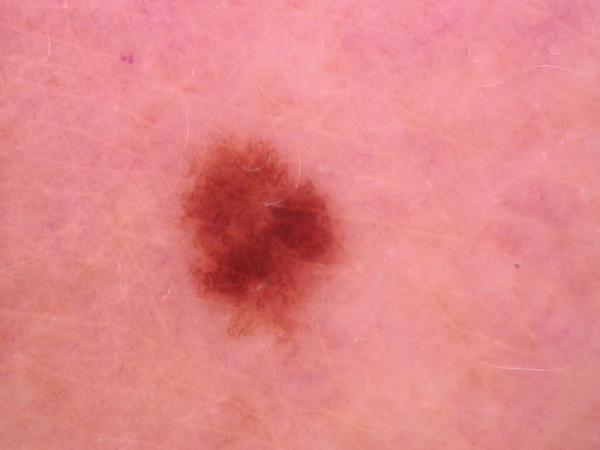

1/1 [==============================] - 0s 47ms/step
('nv', ' melanocytic nevi')


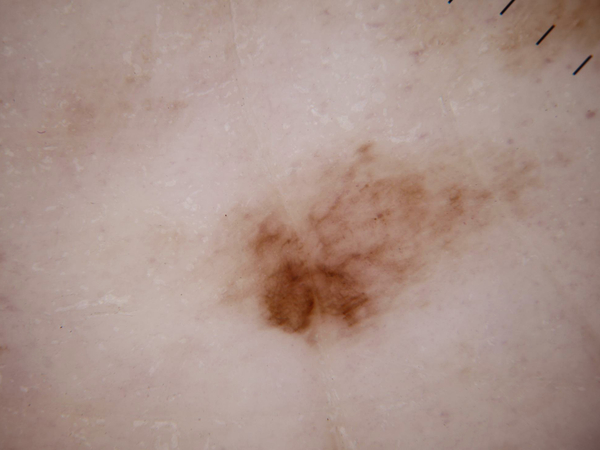

1/1 [==============================] - 0s 63ms/step
('nv', ' melanocytic nevi')


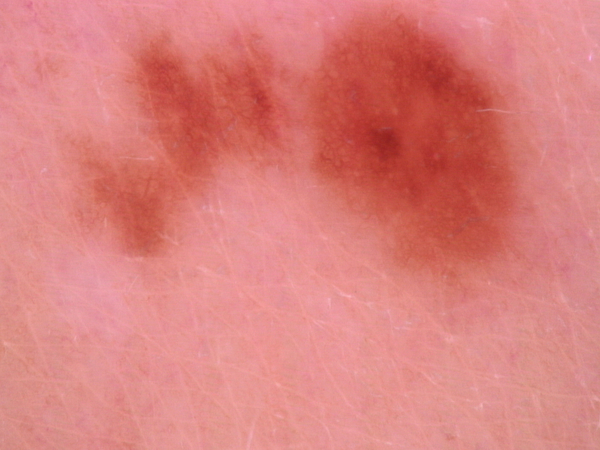

1/1 [==============================] - 0s 70ms/step
('nv', ' melanocytic nevi')


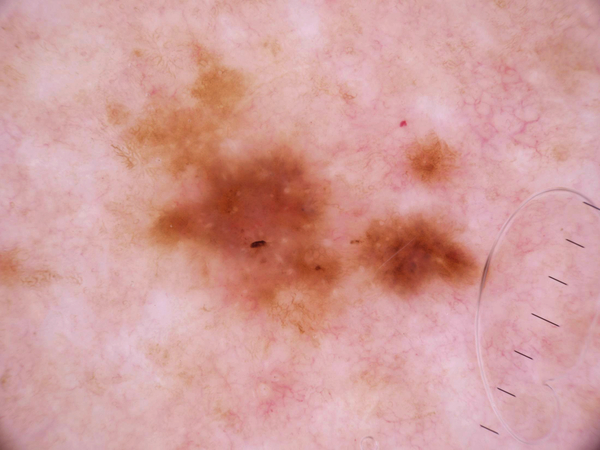

1/1 [==============================] - 0s 57ms/step
('nv', ' melanocytic nevi')


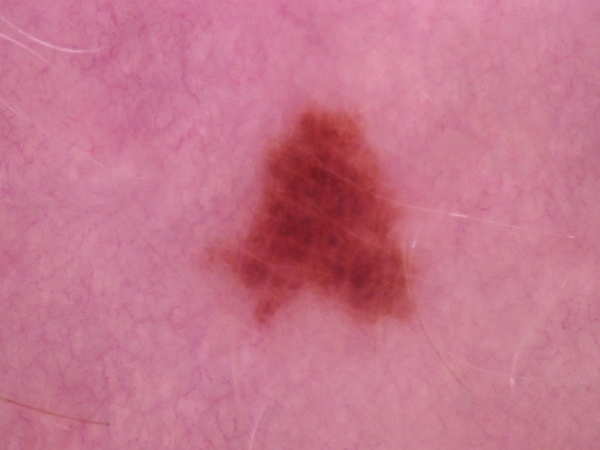

1/1 [==============================] - 0s 52ms/step
('nv', ' melanocytic nevi')


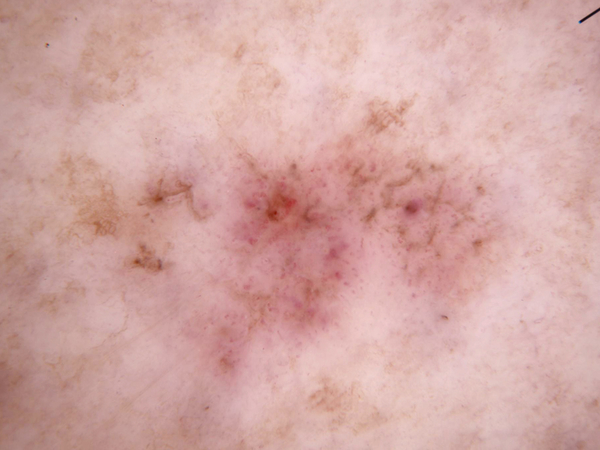

1/1 [==============================] - 0s 95ms/step
('nv', ' melanocytic nevi')


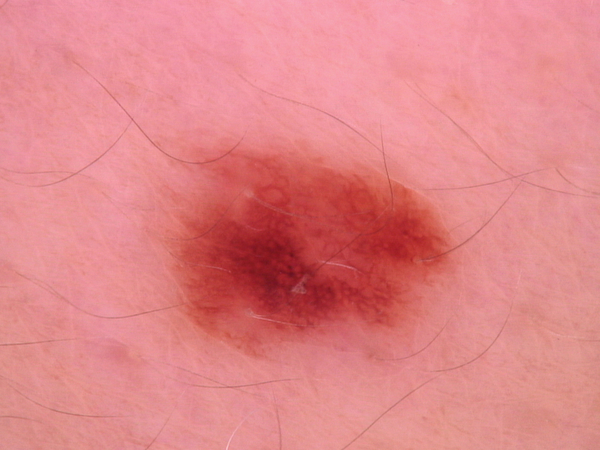

1/1 [==============================] - 0s 34ms/step
('nv', ' melanocytic nevi')


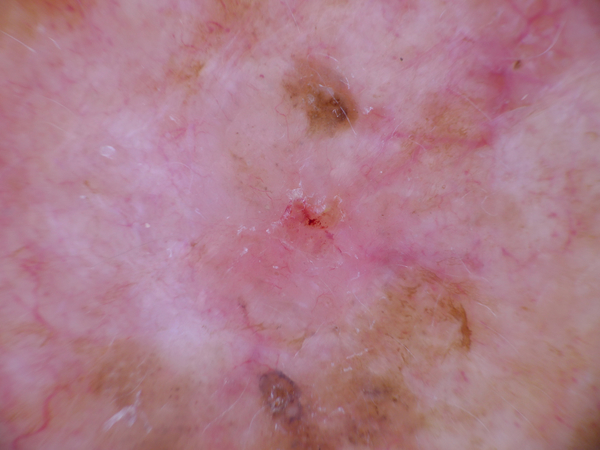

1/1 [==============================] - 0s 48ms/step
('nv', ' melanocytic nevi')


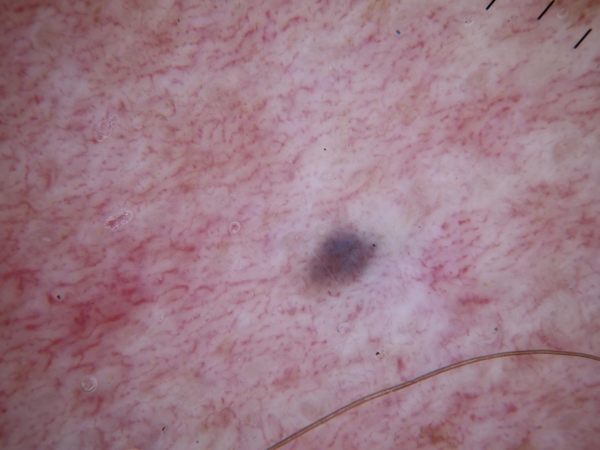

1/1 [==============================] - 0s 69ms/step
('nv', ' melanocytic nevi')


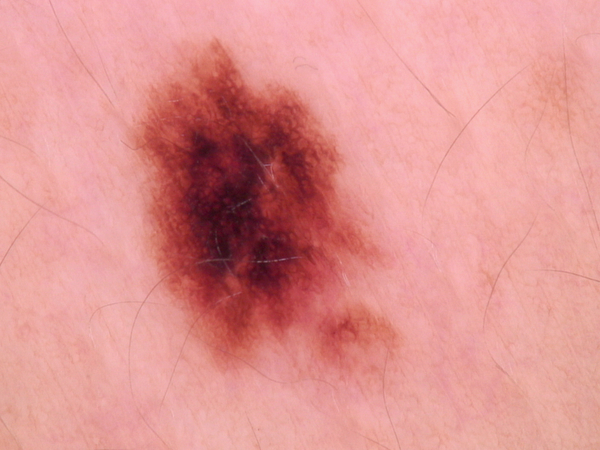

1/1 [==============================] - 0s 34ms/step
('nv', ' melanocytic nevi')


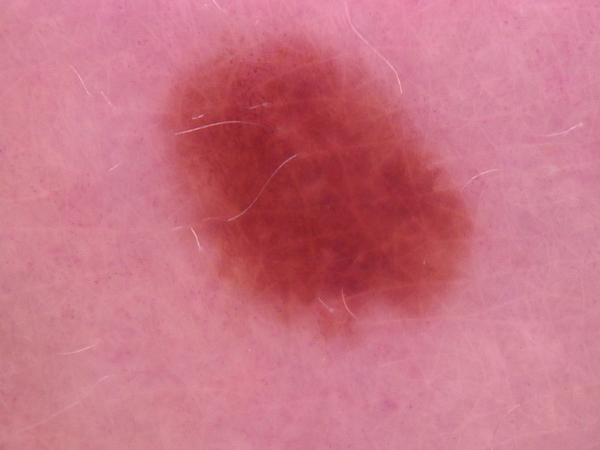

1/1 [==============================] - 0s 40ms/step
('nv', ' melanocytic nevi')


In [37]:
!pip install google.colab
from google.colab import files
from google.colab.patches import cv2_imshow
srcdir = '/content/drive/MyDrive/Skin Disease Prediction(CNN)/images'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    img = cv2.resize(img, (28, 28))
    result = model.predict(img.reshape(1, 28, 28, 3))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10: # number of photos want
        break